In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from mri_data import file_manager as fm
import helpers
from pathlib import Path
import os

from reload_recursive import reload_recursive

In [6]:
reload_recursive(helpers)

In [7]:
drive_root = fm.get_drive_root()
msmri_home = Path("/home/srs-9/Projects/ms_mri")
msmri_datadir = msmri_home / "data"
curr_dir = Path(os.getcwd())
data_dir = curr_dir / "data0"
showfigs = False

In [8]:
df, df_z, data, data_z = helpers.prepare_data(data_dir / "t1_data_full.csv")

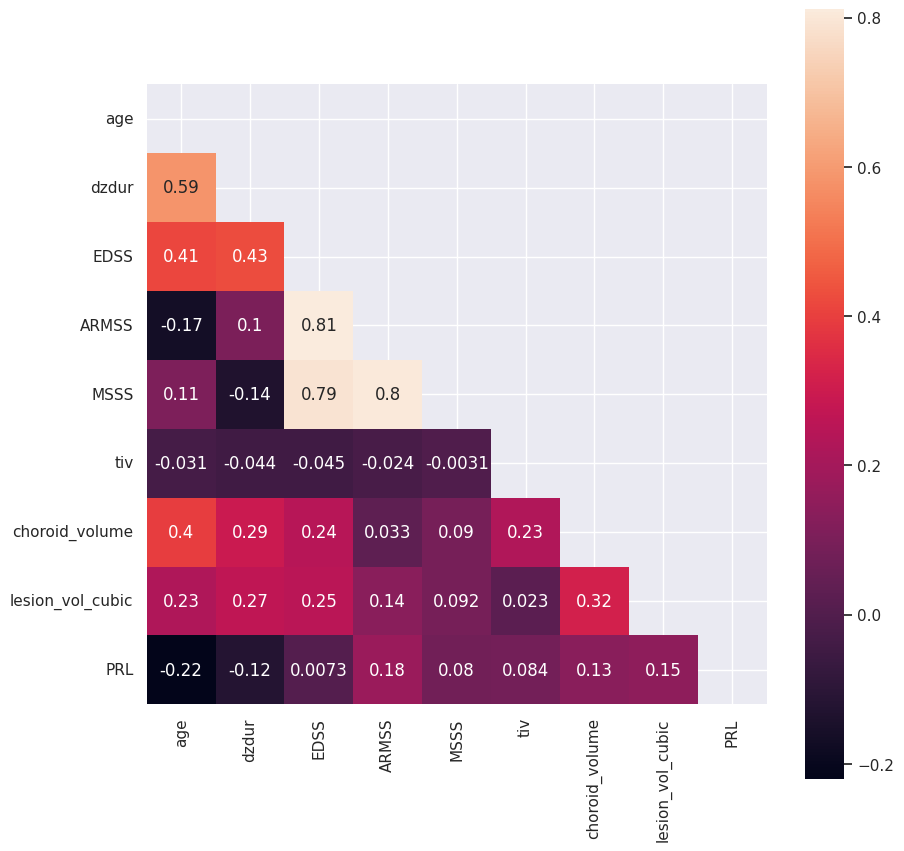

In [26]:
corr_vars = ["age", "dzdur", "EDSS", "ARMSS", "MSSS", "tiv", "choroid_volume", "lesion_vol_cubic", "PRL"]
corr = data_z[corr_vars].corr()
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, mask=matrix, square=True)
sns.set_theme(rc={'figure.figsize':(10,10)})

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_vars = ["age", "dzdur", "EDSS", "tiv", "choroid_volume", "lesion_vol_cubic", "PRL"]
vif_data = data_z[vif_vars].dropna()

vif = pd.DataFrame()
vif["feature"] = vif_data.columns
vif = vif.set_index("feature")
vif['VIF'] = [variance_inflation_factor(vif_data.values, i, )
                          for i in range(len(vif_data.columns))]

In [42]:
vif['VIF']

feature
age                 1.932275
dzdur               1.659854
EDSS                1.341942
tiv                 1.073669
choroid_volume      1.415498
lesion_vol_cubic    1.212435
PRL                 1.171628
Name: VIF, dtype: float64